##### Tables of Content:

1. Introduction: What is credit risk analysis
      
2. Importing Librarys
   
3. Importing Dataset
- 3.1 Looking the Type of Data
- 3.2 Shape of data
- 3.3 Null Numbers
- 3.4 Unique values
- 3.5 The first rows of our dataset
  
4. Exploring some Variables
- 4.1 Ploting some graphical and descriptive informations

5. Feature Engineering:

6. Correlation of data

7. Preprocess
- 7.1 Setting X and Y
- 7.2 Spliting the X and Y in train and test 

##### 1.What is credit risk analysis and what is our purpose?

Credit risk analysis assesses the likelihood that a borrower will default on a loan, helping financial institutions manage potential losses. It involves evaluating the borrower's financial health, credit history, collateral, and macroeconomic factors.<p>
Kredi riski analizi, bir borçlunun kredi veya borç geri ödemesini yapmama olasılığını değerlendirerek finansal kurumların olası kayıplarını yönetmelerine yardımcı olur. Bu analiz, borçlunun finansal durumu, kredi geçmişi, teminat ve makroekonomik faktörler gibi unsurların değerlendirilmesini içerir. 

##### 2.Uploading Libraries:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

##### 3.Importing Dataset:

In [59]:
data = pd.read_csv('german_credit_data.csv')

#Adding target column from the original dataset:
from ucimlrepo import fetch_ucirepo 
statlog_german_credit_data = fetch_ucirepo(id=144) 
y = statlog_german_credit_data.data.targets 

data['Risk'] = y

print(data.info())
print('Shape:',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB
None
Shape: (1000, 11)


In [60]:
data.isna().sum()
#There are sum null values but ı believe it is because of there are no saving or checking accounts of the customers.


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [61]:
print(data['Saving accounts'].value_counts())
print(data['Checking account'].value_counts())
#So we can add None for null values.
data['Saving accounts'] = data['Saving accounts'].fillna('None')
data['Checking account'] = data['Checking account'].fillna('None')

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


In [62]:
print(data['Saving accounts'].value_counts())
print(data['Checking account'].value_counts())

little        603
None          183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
None        394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


In [63]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        5
Checking account       4
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [64]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,None,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,None,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


#### 4.Exploring Some Variables:

In [65]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,None,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,None,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


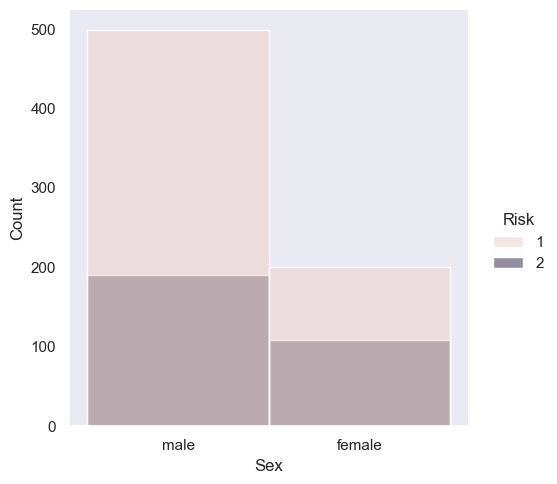

In [66]:
sns.displot(x=data['Sex'],hue=data['Risk'])

<Axes: xlabel='Credit amount', ylabel='Duration'>

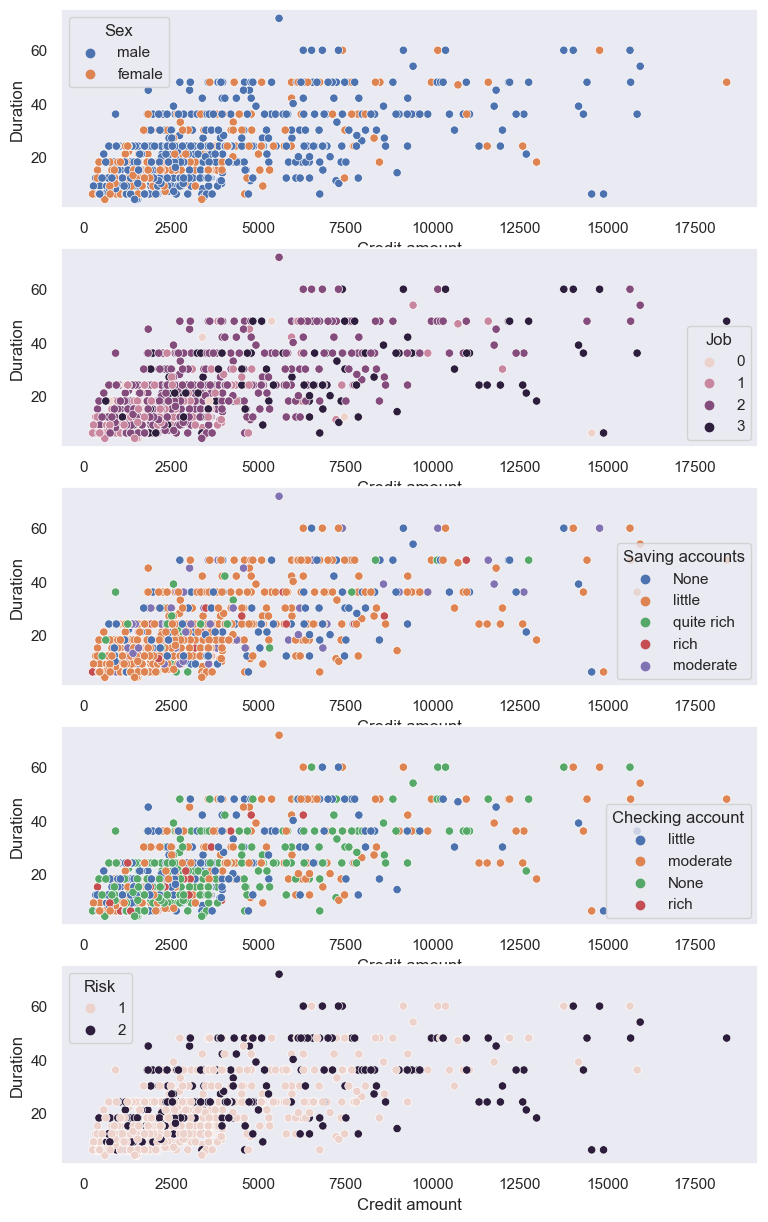

In [67]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(9,15))
sns.scatterplot(x=data['Credit amount'],y=data['Duration'],hue=data['Sex'],ax=ax1)
sns.scatterplot(x=data['Credit amount'],y=data['Duration'],hue=data['Job'],ax=ax2)
sns.scatterplot(x=data['Credit amount'],y=data['Duration'],hue=data['Saving accounts'],ax=ax3)
sns.scatterplot(x=data['Credit amount'],y=data['Duration'],hue=data['Checking account'],ax=ax4)
sns.scatterplot(x=data['Credit amount'],y=data['Duration'],hue=data['Risk'],ax=ax5)

<Axes: xlabel='Age', ylabel='Duration'>

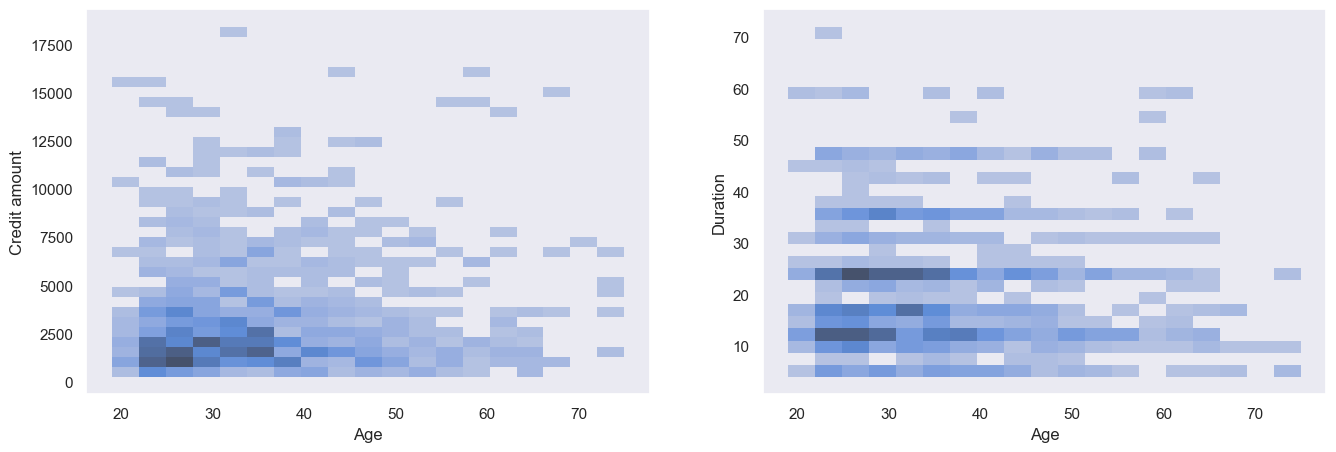

In [68]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
sns.histplot(x=data['Age'],y=data['Credit amount'],ax=ax1)
sns.histplot(x=data['Age'],y=data['Duration'],ax=ax2)

In [69]:
data['Risk'].value_counts()

1    700
2    300
Name: Risk, dtype: int64

Text(0.5, 1.0, 'Counts of Good and Bad risked members')

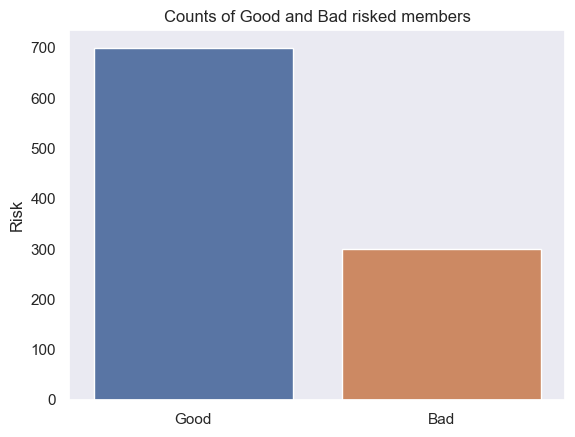

In [70]:
sns.barplot(x=['Good','Bad'],y=data['Risk'].value_counts()).set_title('Counts of Good and Bad risked members')

(array([61., 76., 61., 30., 29., 13., 14.,  9.,  6.,  1.]),
 array([19. , 24.5, 30. , 35.5, 41. , 46.5, 52. , 57.5, 63. , 68.5, 74. ]),
 <BarContainer object of 10 artists>)

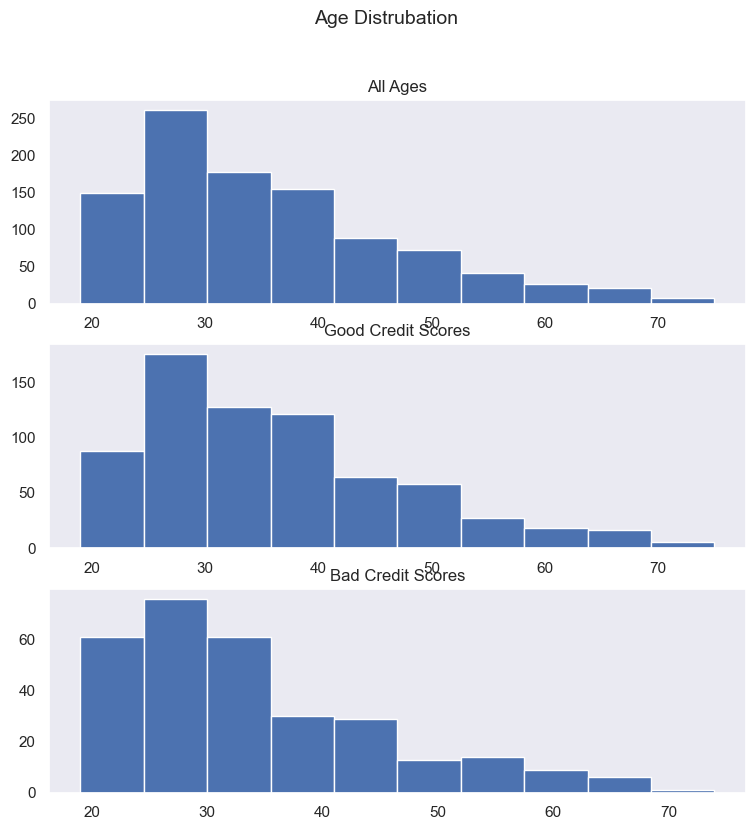

In [71]:
data_good = data.loc[data["Risk"] == 1]['Age'].values.tolist()
data_bad = data.loc[data["Risk"] == 2]['Age'].values.tolist()

f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,9))
f.suptitle('Age Distrubation', fontsize=14)
ax1.title.set_text('All Ages')
ax1.hist(x=data['Age'])
ax2.title.set_text('Good Credit Scores')
ax2.hist(x=data_good)
ax3.title.set_text('Bad Credit Scores')
ax3.hist(x=data_bad)


In [72]:
#Making age column categorical:
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
data["Age_cat"] = pd.cut(data.Age, interval, labels=cats)
data_good = data.loc[data["Risk"] == 1]['Age'].values.tolist()
data_bad = data.loc[data["Risk"] == 2]['Age'].values.tolist()

<Axes: xlabel='Age_cat', ylabel='Credit amount'>

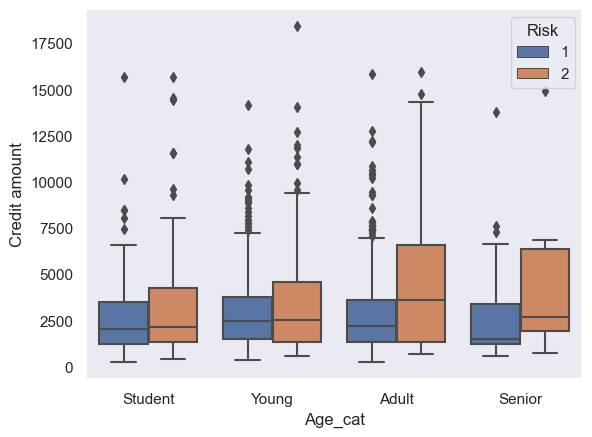

In [73]:
sns.boxplot(x=data['Age_cat'],y=data['Credit amount'],hue=data['Risk'])

<Axes: xlabel='Housing', ylabel='Count'>

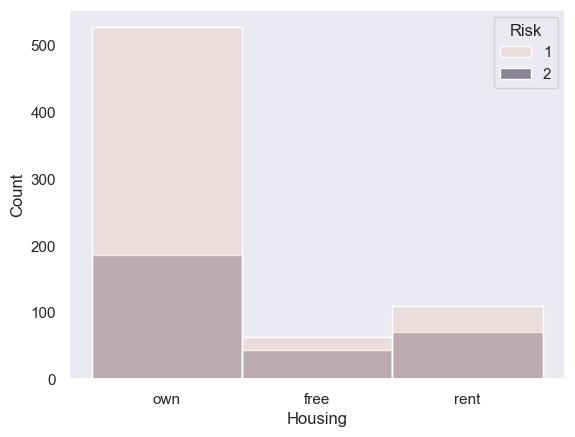

In [74]:
sns.set_theme(style="dark")
sns.histplot(x=data['Housing'],hue=data['Risk'])

<Axes: xlabel='Housing', ylabel='Credit amount'>

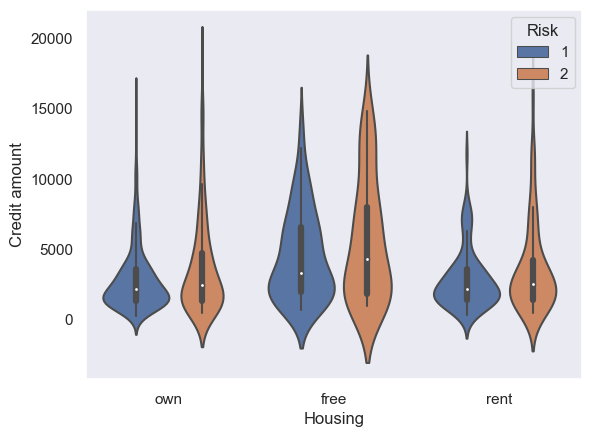

In [75]:
sns.violinplot(data=data,x='Housing',y='Credit amount',hue='Risk')

#### 5.Feature Engineering:

In [76]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,None,little,1169,6,radio/TV,1,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2,Student
2,2,49,male,1,own,little,None,2096,12,education,1,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1,Adult
4,4,53,male,2,free,little,little,4870,24,car,2,Adult


In [77]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        5
Checking account       4
Credit amount        921
Duration              33
Purpose                8
Risk                   2
Age_cat                4
dtype: int64

Let's put dummies for categorical values on our dataset.

In [78]:
data = data.merge(pd.get_dummies(data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data['Saving accounts'], drop_first=True, prefix='Saving accounts'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data['Checking account'], drop_first=True, prefix='Checking account'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data['Purpose'], drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data['Age_cat'], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(data['Risk'], drop_first=True, prefix='Risk'), left_index=True, right_index=True)


del data['Sex']
del data['Housing']
del data['Saving accounts']
del data['Checking account']
del data['Purpose']
del data['Age_cat']
del data['Risk']

In [79]:
data.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,Risk_2
0,0,67,2,1169,6,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,22,2,5951,48,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,49,1,2096,12,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,3,45,2,7882,42,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,4,53,2,4870,24,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


#### 6.Correlation Matrix:

<Axes: >

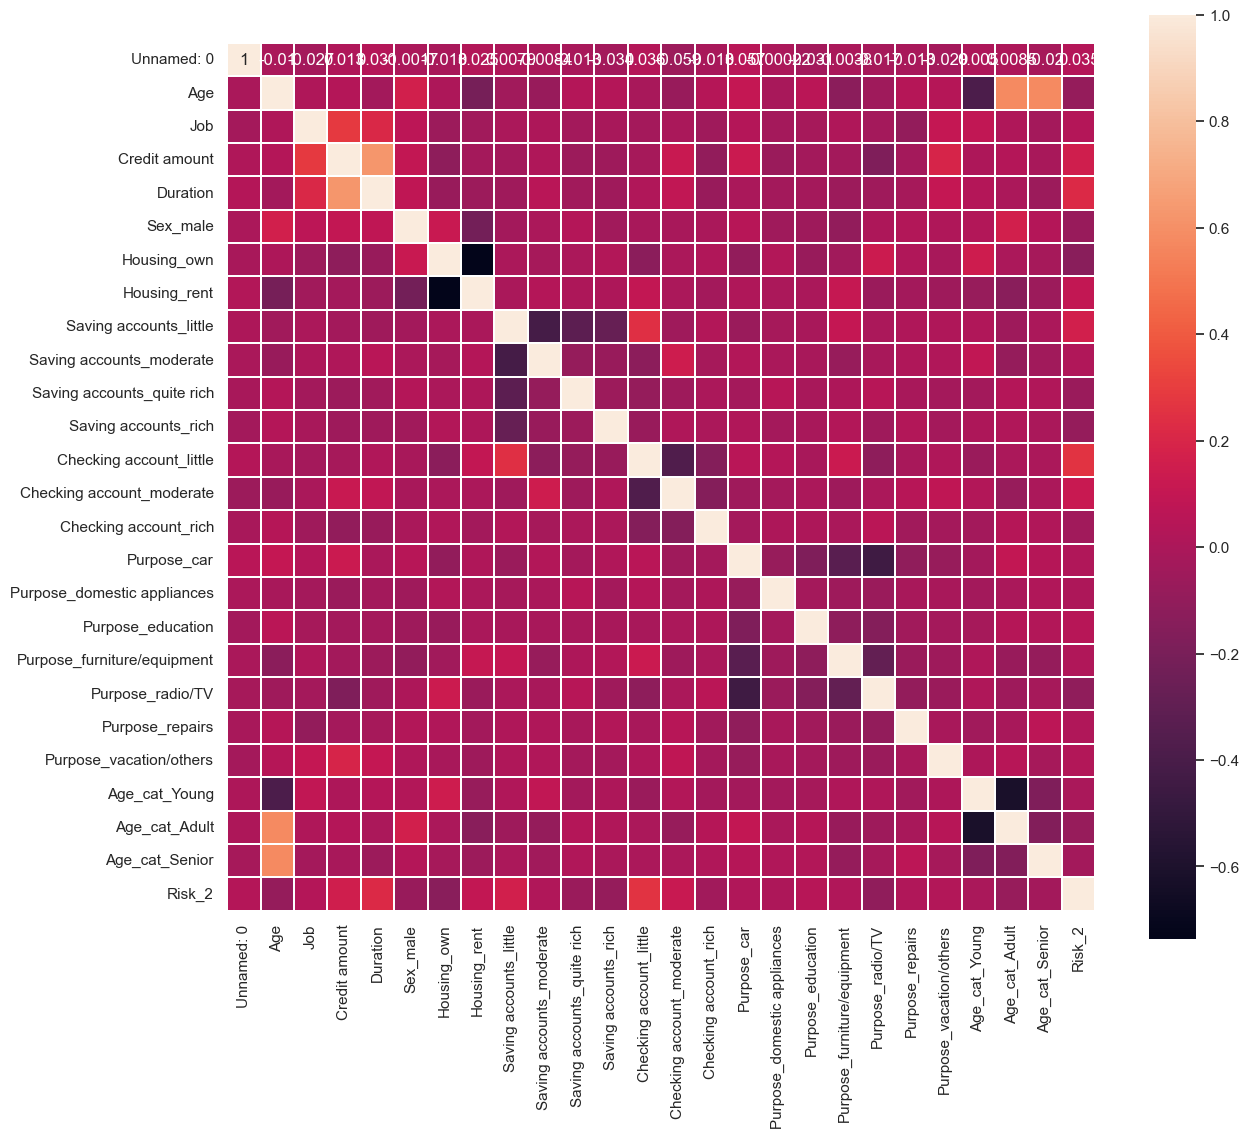

In [85]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0,square=True,  linecolor='white', annot=True)

#### Preprocess:

In [89]:
#Creating the X and y variables
X = data.drop('Risk_2', 1).values
y = data["Risk_2"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

C:\Users\yigit\AppData\Local\Temp\ipykernel_14168\2899301626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Risk_2', 1).values


#### Trying Models:

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[Text(1, 0, 'LR'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'NB'),
 Text(6, 0, 'RF'),
 Text(7, 0, 'SVM'),
 Text(8, 0, 'XGB')]

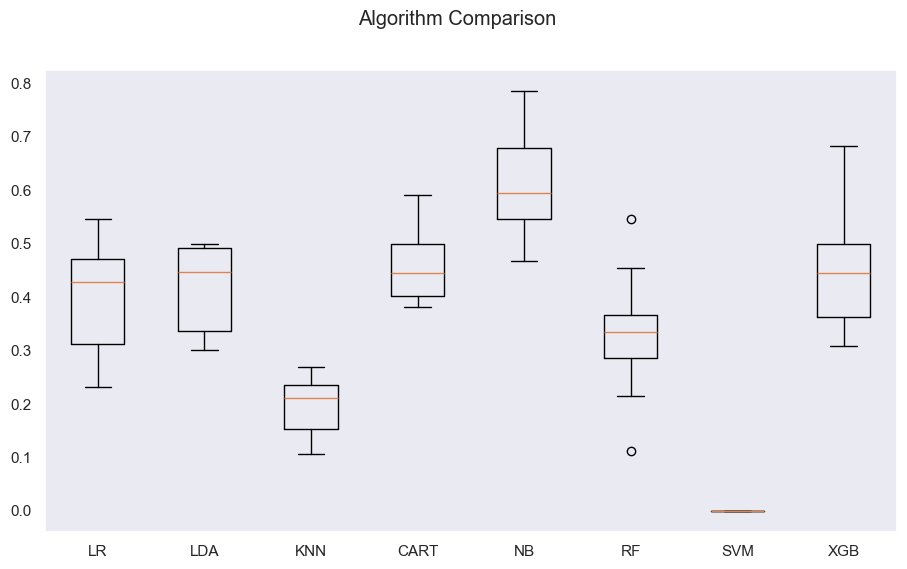

In [92]:
# to set a random state:
seed = 3

# adidng models:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

results=[]
names=[]
scoring='recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)

fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)